In [3]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")

print(movies)

                                               FILM  RottenTomatoes  \
0                    Avengers: Age of Ultron (2015)              74   
1                                 Cinderella (2015)              85   
2                                    Ant-Man (2015)              80   
3                            Do You Believe? (2015)              18   
4                     Hot Tub Time Machine 2 (2015)              14   
5                          The Water Diviner (2015)              63   
6                             Irrational Man (2015)              42   
7                                   Top Five (2014)              86   
8                      Shaun the Sheep Movie (2015)              99   
9                               Love & Mercy (2015)              89   
10                Far From The Madding Crowd (2015)              84   
11                                 Black Sea (2015)              82   
12                                 Leviathan (2014)              99   
13    

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(movies["Fandango_Stars"])


NameError: name 'movies' is not defined

In [6]:
import numpy

print(movies["Fandango_Stars"].mean())
print(movies["Metacritic_norm_round"].mean())

print(movies["Fandango_Stars"].median())
print(movies["Metacritic_norm_round"].median())

print(numpy.std(movies["Fandango_Stars"]))
print(numpy.std(movies["Metacritic_norm_round"]))

4.08904109589
2.97260273973
4.0
3.0
0.53853216127
0.987561029704


Metacritic's scoring converts each critic's review into a percentage, either mathematically from the mark given, or which the site decides subjectively from a qualitative review. Before being averaged, the scores are weighted according to the critic's fame, stature, and volume of reviews

However fandango's review seem to be skewed due to an unfair way of considering few user comments to rate the movie. As fandango sells movie tickets as well, even one user comment rate the movie nearly three and also comments as less as 30 give a rating more than 4.

As most of the scores for metacritic seem to be normally distributed, its median is more than mean unlike that of fandangos' where its skewed to have rating more than 3 for most of the movies making its meadian less the mean.



                        FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user

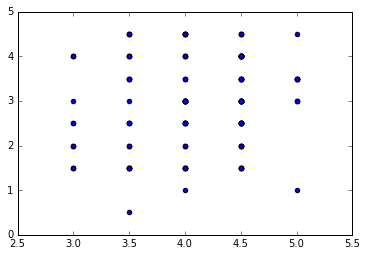

In [10]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
movies["fm_diff"] = numpy.abs(movies["Fandango_Stars"]-movies["Metacritic_norm_round"])
movies_sorted = movies.sort_values(["fm_diff"],ascending=False)
print(movies_sorted.head(5))

In [12]:
from scipy import stats

corr = stats.pearsonr(movies["Fandango_Stars"],movies["Metacritic_norm_round"])
print(corr)

(0.17844919073895918, 0.031161516228523815)


In [25]:
slope,intercept,rvalue,pvalue,stderr = stats.linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
print(slope,intercept)

0.0973110779739 3.7997739189


In [27]:
pred_3 = 3*slope+intercept

print(pred_3)

4.09170715282


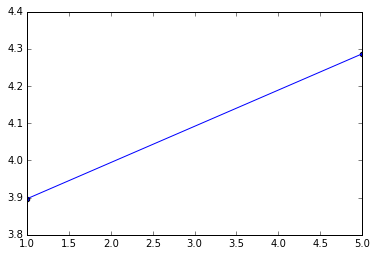

In [29]:
pred_1 = 1*slope+intercept
pred_5 = 5*slope+intercept

plt.plot([1.0,5.0],[pred_1,pred_5])
plt.xlim(1,5)
plt.scatter([1.0,5.0],[pred_1,pred_5])
plt.show()
